In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part 1 - Exploratory Data Analysis

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.shape

(93142, 1)

In [5]:
df.info()
# no null values, good start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
df['login_time'] = pd.to_datetime(df['login_time'])
df = df.set_index('login_time')

In [7]:
df['count'] = 1.0

In [8]:
# aggregate times in 15 min intervals to look at patterns
df1 = df.resample('15T', label = 'right').sum()
df1.head()

,count
login_time,
1970-01-01 20:15:00,2.0
1970-01-01 20:30:00,6.0
1970-01-01 20:45:00,9.0
1970-01-01 21:00:00,7.0
1970-01-01 21:15:00,1.0


In [9]:
df1.shape

(9788, 1)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   9788 non-null   float64
dtypes: float64(1)
memory usage: 152.9 KB


No null values after aggregating by 15 minute intervals, can move onto visualizing data to identify early patterns

In [11]:
# extract time features from data
df1['time'] = pd.to_datetime(df1.index)

In [12]:
type(df1.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df1['hour'] = df1.time.dt.hour
df1['day'] = df1.time.dt.day
df1['month'] = df1.time.dt.month
df1['week'] = df1.time.dt.isocalendar().week
df1['weekday'] = df1.time.dt.weekday

In [14]:
# check results
df1.head()

,count,time,hour,day,month,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2.0,1970-01-01 20:15:00,20,1,1,1,3
1970-01-01 20:30:00,6.0,1970-01-01 20:30:00,20,1,1,1,3
1970-01-01 20:45:00,9.0,1970-01-01 20:45:00,20,1,1,1,3
1970-01-01 21:00:00,7.0,1970-01-01 21:00:00,21,1,1,1,3
1970-01-01 21:15:00,1.0,1970-01-01 21:15:00,21,1,1,1,3


In [16]:
df1.tail()

,count,time,hour,day,month,week,weekday
login_time,,,,,,,
1970-04-13 18:00:00,5.0,1970-04-13 18:00:00,18,13,4,16,0
1970-04-13 18:15:00,5.0,1970-04-13 18:15:00,18,13,4,16,0
1970-04-13 18:30:00,2.0,1970-04-13 18:30:00,18,13,4,16,0
1970-04-13 18:45:00,7.0,1970-04-13 18:45:00,18,13,4,16,0
1970-04-13 19:00:00,6.0,1970-04-13 19:00:00,19,13,4,16,0


### Grouping and Visualizing Data by Month

In [15]:
print('Data Grouped by Month')
df1.groupby('month')['count'].aggregate(np.sum)

Data Grouped by Month


month
1    21225.0
2    24669.0
3    33727.0
4    13521.0
Name: count, dtype: float64

([<matplotlib.axis.XTick at 0x7fc074e03220>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Feburary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April')])

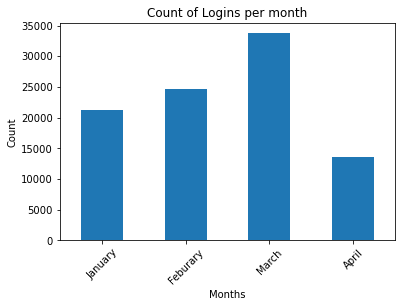

In [17]:
df1.groupby('month')['count'].sum().plot(kind = 'bar')
plt.title('Count of Logins per month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(ticks = [0,1,2,3],labels = ['January', 'Feburary','March','April'], rotation = 45)

There was an increase in logins from January to March, with March having the highest login count. There is not date for the entire month of April so it makes it hard to make assumptions about that month.

### Grouping and Vizualizing Data by Week

In [18]:
print('Data Grouped by Week')
df1.groupby('week')['count'].aggregate(np.sum)

Data Grouped by Week


week
1     2368.0
2     5218.0
3     5021.0
4     4750.0
5     4747.0
6     5564.0
7     5914.0
8     7038.0
9     6554.0
10    7400.0
11    7329.0
12    8959.0
13    7284.0
14    8096.0
15    6496.0
16     404.0
Name: count, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

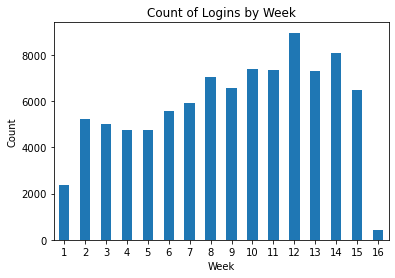

In [19]:
df1.groupby('week')['count'].sum().plot(kind = 'bar')
plt.title('Count of Logins by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation = 0)

The largest count of logins is seen in week 12 which is the last week of March, the second highest count of logins is week 14, which is the second week of April, and we can see that the data ends during week 16, a week in April

### Grouping and Vizualizing Average Weekday Logins

In [20]:
import calendar
nweek = 16 #number of weeks in data, want to look at average weekday logins
print('Data Grouped by Weekday')
df1.groupby('weekday')['count'].aggregate(np.sum)/nweek

Data Grouped by Weekday


weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64

([<matplotlib.axis.XTick at 0x7fc074d60ca0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

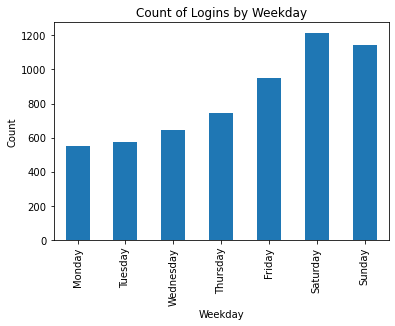

In [22]:
(df1.groupby('weekday')['count'].sum()/nweek).plot(kind = 'bar')
plt.title('Count of Logins by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])

Here we see that the login occurrence increases from the beginning of the week with the highest count of logins being on Saturdays, with Sundays following closely behind

In [24]:
# want to look at logins by day, need to resample first dataframe by day
dfbyday = df.resample('D').sum()
dfbyday.head()

,count
login_time,
1970-01-01,112.0
1970-01-02,681.0
1970-01-03,793.0
1970-01-04,788.0
1970-01-05,459.0


In [25]:
dfbyday['date'] = pd.to_datetime(dfbyday.index)
dfbyday['weekday'] = dfbyday.date.dt.weekday
dfbyday.head()

,count,date,weekday
login_time,,,
1970-01-01,112.0,1970-01-01,3
1970-01-02,681.0,1970-01-02,4
1970-01-03,793.0,1970-01-03,5
1970-01-04,788.0,1970-01-04,6
1970-01-05,459.0,1970-01-05,0


([<matplotlib.axis.XTick at 0x7fc077bb33d0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

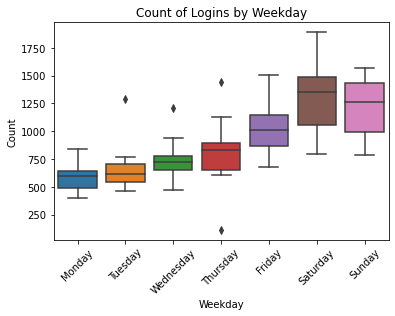

In [31]:
ax = sns.boxplot(x = 'weekday', y = 'count', data = dfbyday)
plt.title('Count of Logins by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)

We can see the same general trend in the weekday logins as the previous bar graph, but there are outliers seen on Tuesday, Wednesday, and Thursday

### Grouping and Vizualizing Average Hourly Logins

In [32]:
ndays = 31+28+31+13
print('Average Hourly Login Count')
df1.groupby('hour')['count'].aggregate(np.sum)/ndays

Average Hourly Login Count


hour
0     58.135922
1     61.184466
2     57.873786
3     49.271845
4     45.844660
5     37.786408
6     13.407767
7      8.291262
8      7.436893
9     12.359223
10    24.495146
11    50.980583
12    53.233010
13    36.514563
14    33.320388
15    30.941748
16    27.805825
17    25.310680
18    27.621359
19    30.873786
20    36.592233
21    51.300971
22    63.339806
23    60.368932
Name: count, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

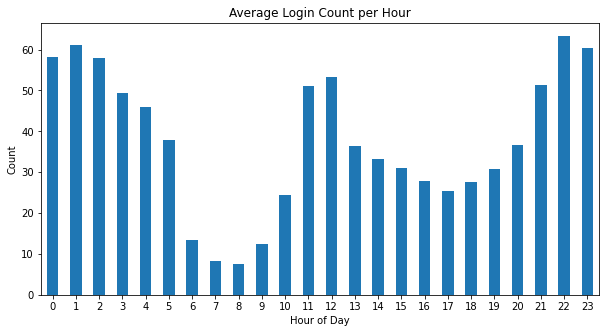

In [34]:
(df1.groupby('hour')['count'].sum()/ndays).plot(kind = 'bar', figsize = (10,5))
plt.title('Average Login Count per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation = 0)

This bar plot shows us that the most logins happen between 10 pm and 2 am with the lowest average logins being between 6 am to 10 am

In [37]:
# look into logins per hour
dfbyhour = df.resample('H').sum()
dfbyhour.head()

,count
login_time,
1970-01-01 20:00:00,24.0
1970-01-01 21:00:00,9.0
1970-01-01 22:00:00,21.0
1970-01-01 23:00:00,58.0
1970-01-02 00:00:00,53.0


In [38]:
dfbyhour['time'] = pd.to_datetime(dfbyhour.index)
dfbyhour['hour'] = dfbyhour.time.dt.hour
dfbyhour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24.0,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9.0,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21.0,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58.0,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53.0,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

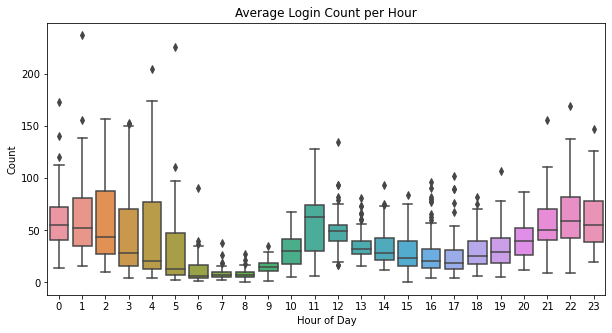

In [41]:
sns.mpl.rc("figure", figsize = (10,5))
ax = sns.boxplot(x = 'hour', y = 'count', data = dfbyhour)
plt.title('Average Login Count per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation = 0)

Here we can again see that the lowest number of logins are between 6 and 10 am, with outliers occurring for the large majority of hours of the day, with the largest outliers seen from 1 am to 5 am

## Conclusions for Part 1

From the data, we know that logins increased from January to March with March being the highest count. 
The highest week count was seen in week 12, a week in March, followed by week 14, a week in April. 
From the average weekday login information, we can see that the highest average count was Saturday followed by Sunday then Friday
The hourly login data showed that the highest average logins per hour were between 10 am and 2 am, with the lowest being between 6 am and 10 am, though there were outliers for each hour execpt 10 am, 11 am, and 8 pm.

---

# Part 2 - Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

  However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
 
 
 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
 
 
 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    
  a) how you will implement the experiment
    
  b) what statistical test(s) you will conduct to verify the significance of the observation
    
  c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.


## Solution

1) In this scenario, I would evaluate the income of the partner drivers before toll reimbursement and post reimbursement to understand if the income for partner drivers is increased by incentivizing drivers to drive over the toll. The higher total income per driver will indicate more success

2) Partner drivers are in this field to make enough money to support their lives, therefore the success of the experiment can be measured by increased profit for said drivers. The practical experiment would be to aggregate total income per driver, pre and post toll reimbursement being offered and compare to identify if the proposal will increase cross partner drivers.

    a) I will implement this experiment by averaging income per driver per city, for both pre and post toll experiment
    
    b) As the samples are relatively small and continuous numeric values I will perform t-tests between pre and post toll reimbursement income, to identify significance between income levels
    
    c) To interpret the results and make a recommendation to the city operations team, I would explain that if driver income does not increase, the city could be losing money as a whole by reimbursing the toll fees, since higher income leads to higher spending, therefore more tax money infused into the city. If the income does not increase, the respective city would be losing money on reimbursements as well as tax money from drivers who make the same if not less money.

# Part 3: Predictive Modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).


### Data description
* **city**: city this user signed up in
* **phone**: primary device for this user
* **signup_date**: date of account registration; in the form ‘YYYYMMDD’
* **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’
* **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
* **avg_rating_by_driver**: the rider’s average rating over all of their trips
* **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
* **surge_pct**: the percent of trips taken with surge multiplier > 1
* **avg_surge**: The average surge multiplier over all of this user’s trips
* **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
* **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* **weekday_pct**: the percent of the user’s trips occurring during a weekday

In [3]:
dful = pd.read_json('ultimate_data_challenge.json')

In [4]:
dful.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
dful.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [6]:
dful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


From the initial look at the data, we can see that there are null valules in the columns: avg_rating_of_driver, phone, and avg_rating_by_driver. Phone is a seemingly unimportant feature, and avg_rating_of_driver, and avg_rating_by_driver can be filled in by the mean or median of the column. 

In [7]:
dful.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
# Fill missing vallues with mean and drop phone column
dful['avg_rating_of_driver'].fillna(dful['avg_rating_of_driver'].mean(), inplace = True)
dful['avg_rating_by_driver'].fillna(dful['avg_rating_of_driver'].mean(), inplace = True)

In [9]:
dful['phone'].fillna('Other', inplace = True)

In [10]:
dful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Exploratory Data Analysis

In [11]:
# extract categorical and numeric features
cat_feat = ['city','phone', 'ultimate_black_user']

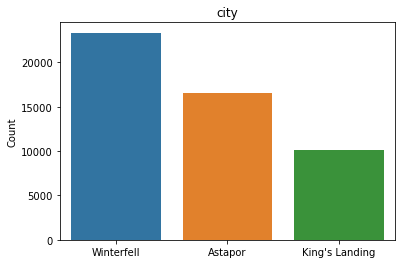

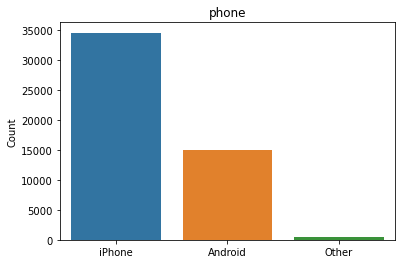

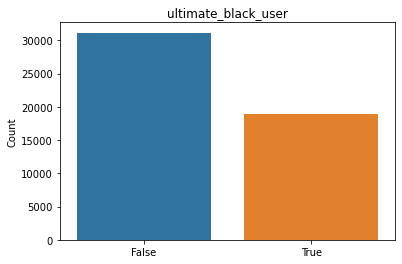

In [12]:
for i in cat_feat:
    sns.barplot(x = dful[i].value_counts().index, y = dful[i].value_counts() )
    plt.title(i)
    plt.ylabel('Count')
    plt.show()

In [13]:
num_feat = ['trips_in_first_30_days','avg_rating_of_driver','avg_rating_by_driver','avg_surge','surge_pct',
            'weekday_pct','avg_dist']

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


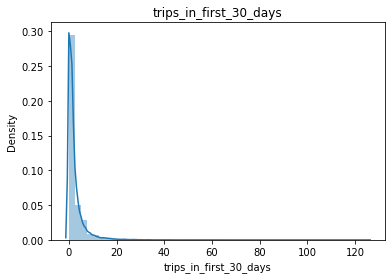

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


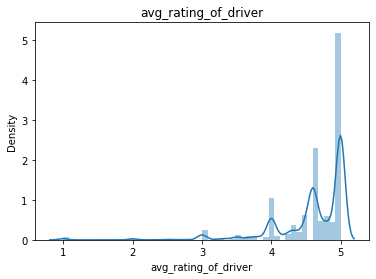

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


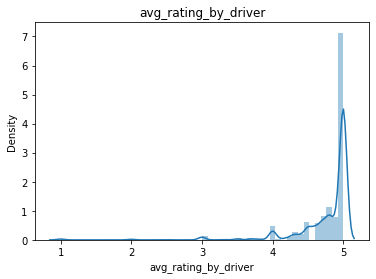

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


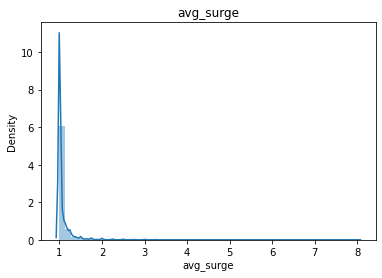

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


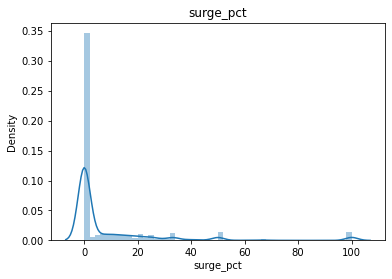

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


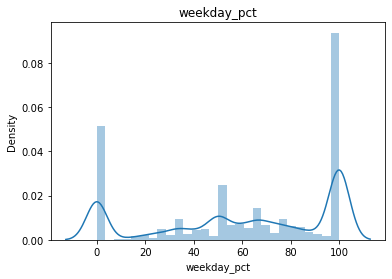

/Users/brookehanson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


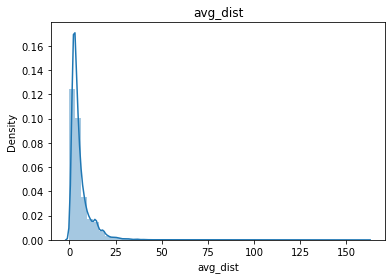

In [14]:
for i in num_feat:
    sns.distplot(dful[i])
    plt.title(i)
    plt.show();

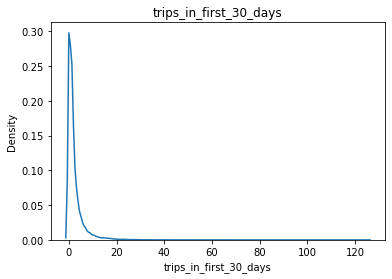

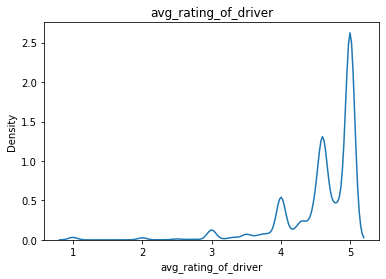

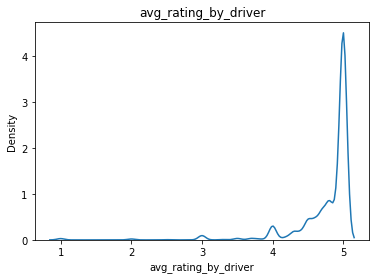

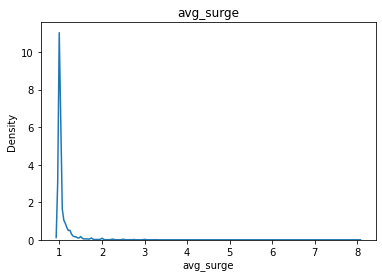

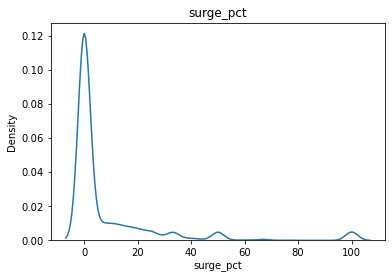

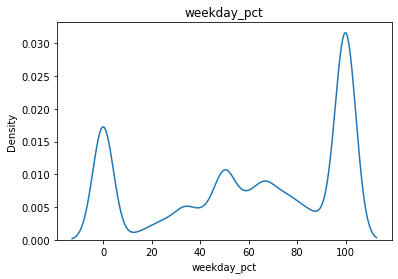

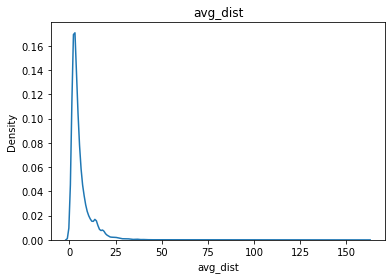

In [15]:
for i in num_feat:
    sns.kdeplot(dful[i])
    plt.title(i)
    plt.show();

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


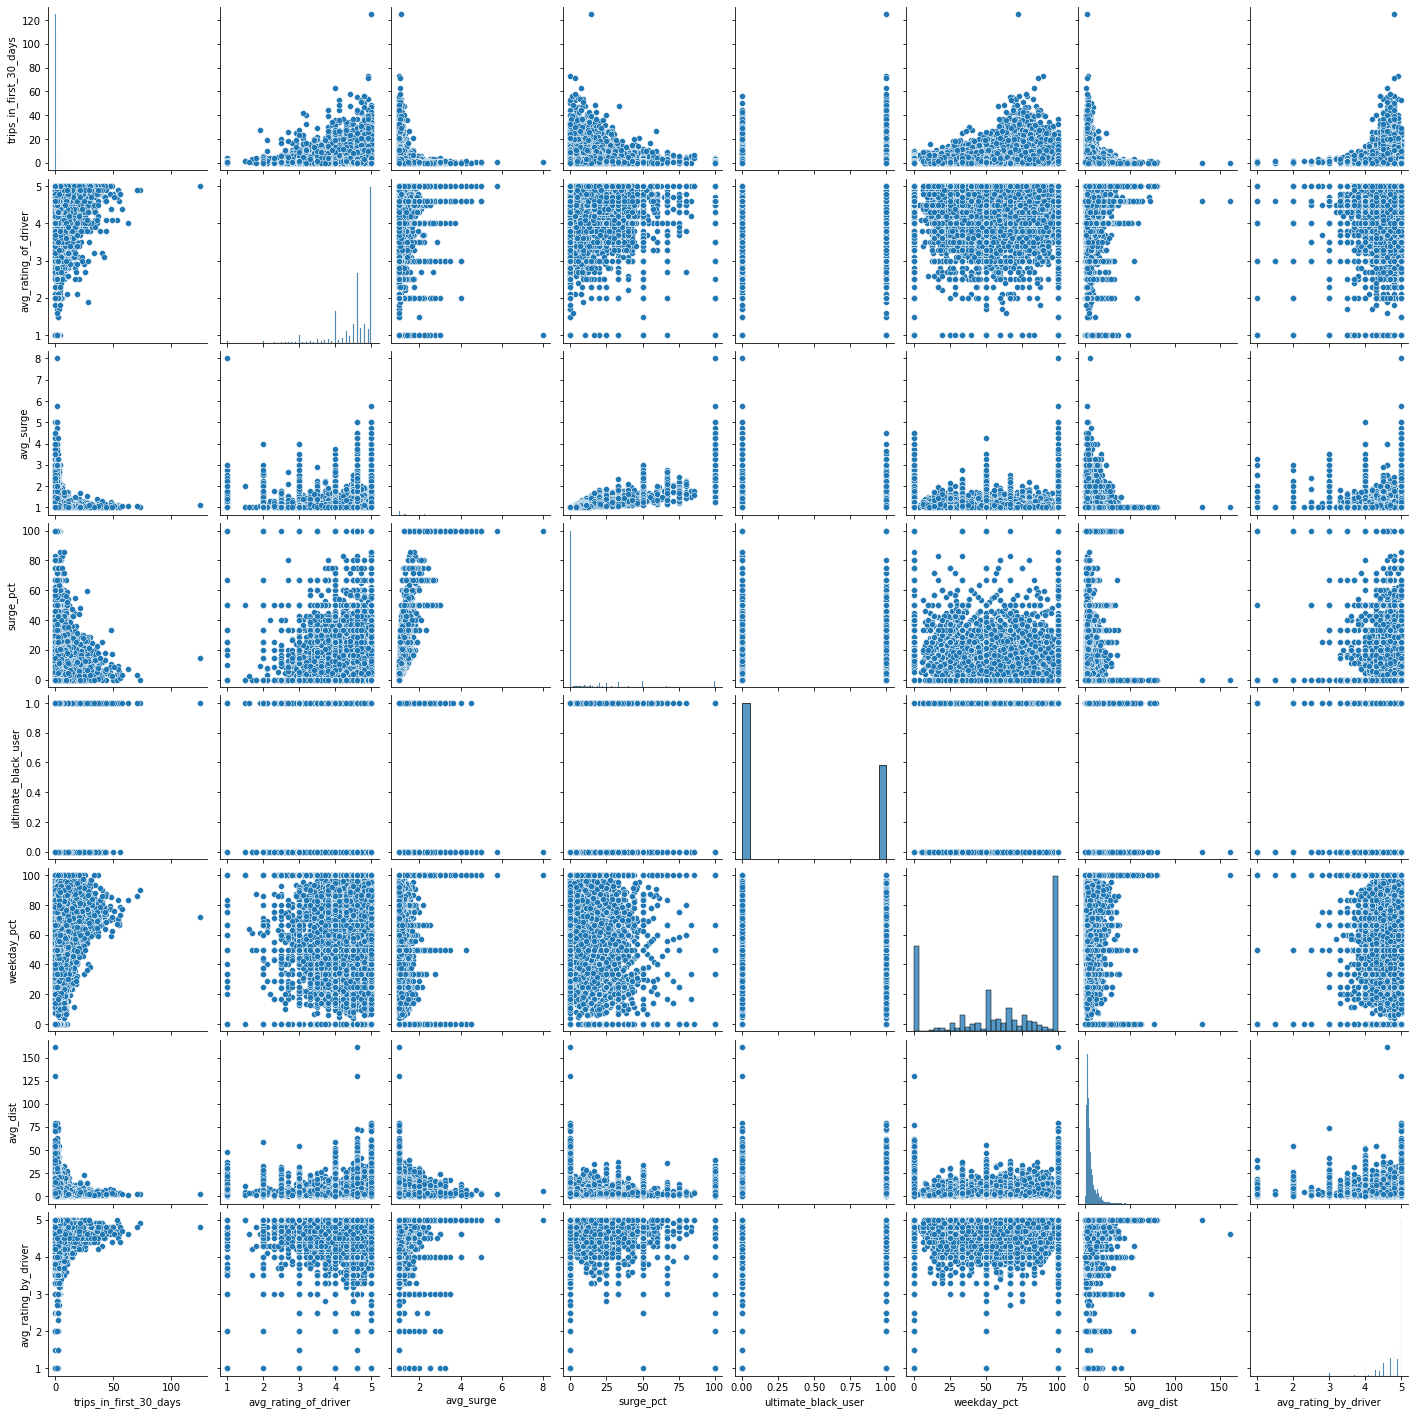

In [16]:
sns.pairplot(dful)

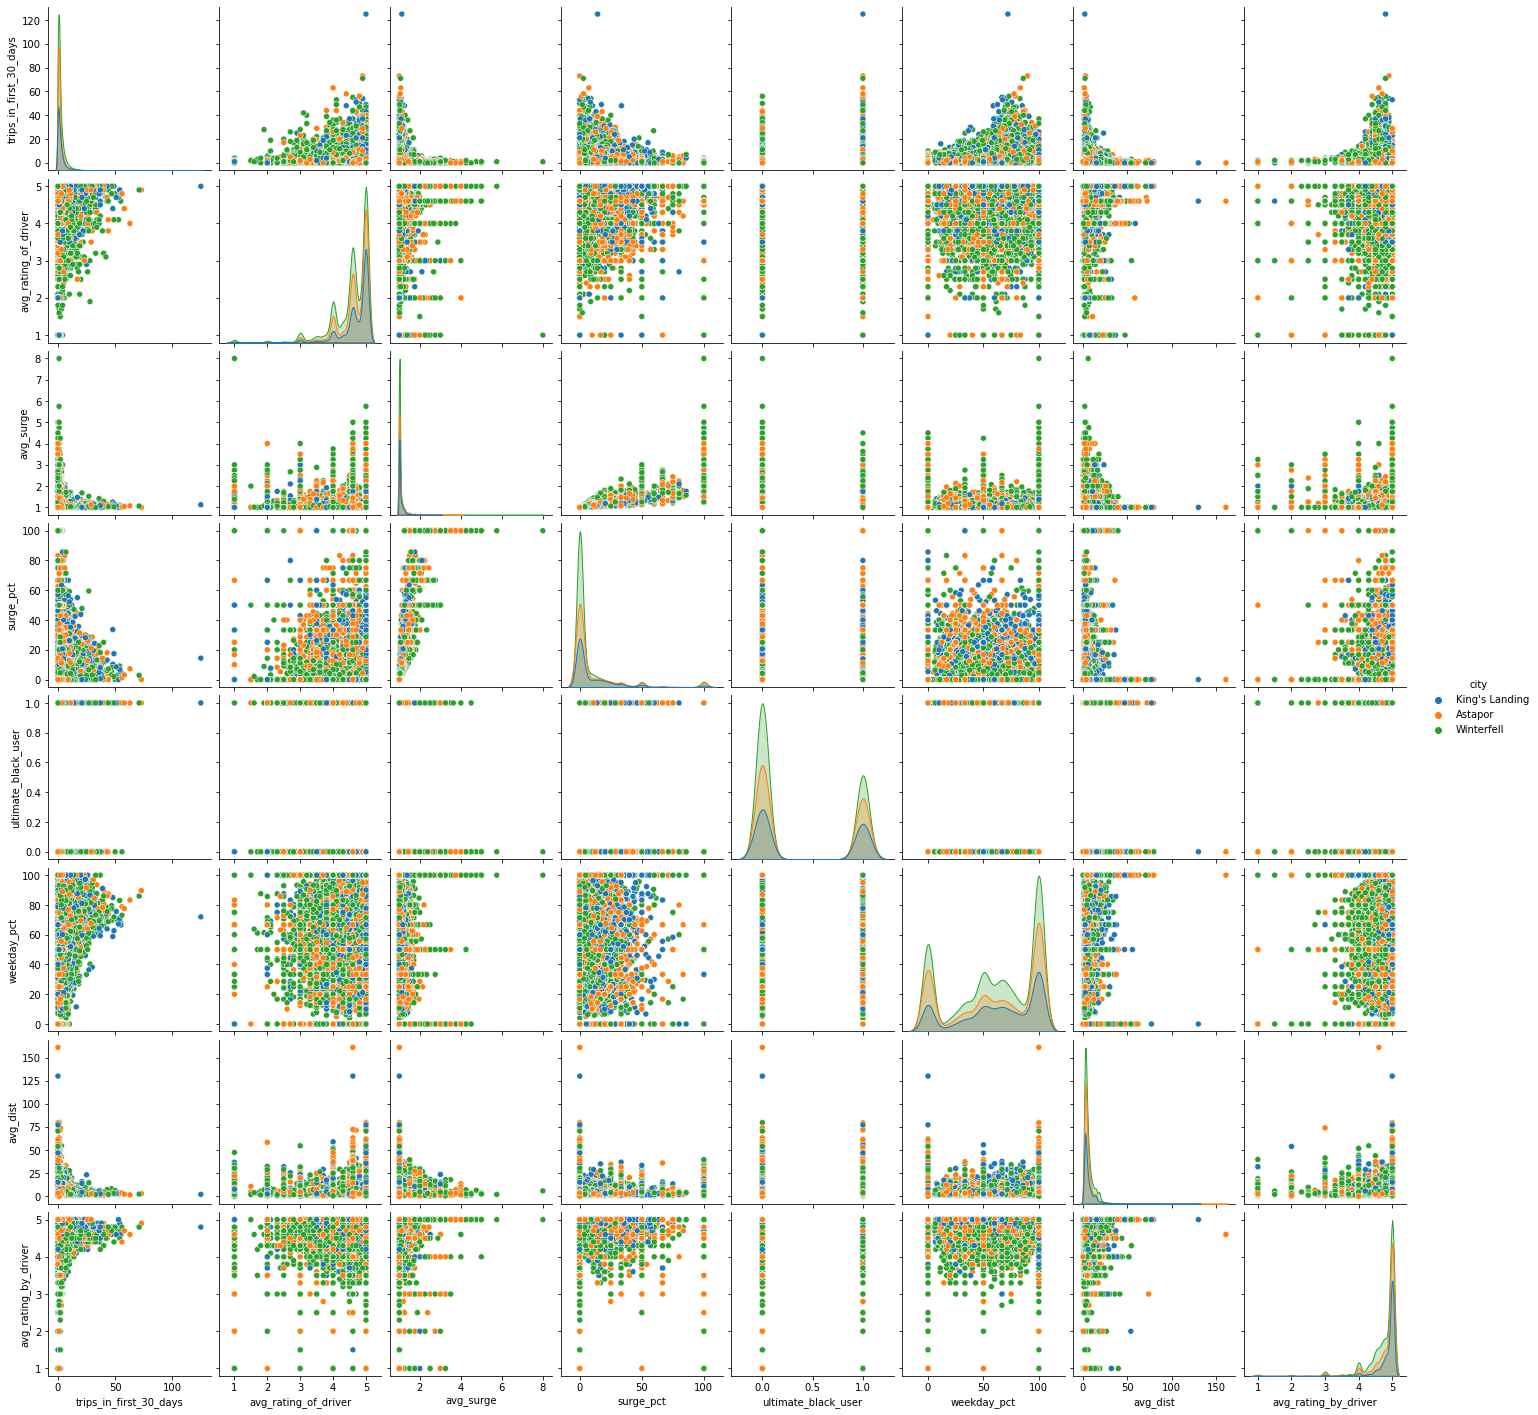

In [21]:
sns.pairplot(dful, hue = 'city')

**What percent of users were retained?**

In [20]:
dful.sort_values(by = 'last_trip_date').tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45126,Winterfell,1,2014-01-10,4.6,1.02,2014-07-01,Android,6.3,False,56.3,6.13,4.6
38651,King's Landing,0,2014-01-13,4.9,1.00,2014-07-01,iPhone,0.0,True,92.3,10.19,5.0
14473,King's Landing,0,2014-01-02,5.0,1.00,2014-07-01,Android,0.0,False,100.0,5.06,5.0
22735,Winterfell,0,2014-01-08,5.0,1.00,2014-07-01,iPhone,0.0,True,75.0,8.71,5.0
45357,Astapor,5,2014-01-28,4.4,1.02,2014-07-01,iPhone,1.4,False,76.4,3.90,4.9


In [22]:
dful['last_trip_date'].sort_values().tail()

45126    2014-07-01
38651    2014-07-01
14473    2014-07-01
22735    2014-07-01
45357    2014-07-01
Name: last_trip_date, dtype: object

In this scenario we consider a rider is retained if the user has taken a ride within the last 30 days. From the last_trip_date sorted values above, the latest trip was 7-01, therefore we will consider a user retained if they have ridden after 6-01

In [24]:
frac = len(dful[dful['last_trip_date'] > '2014-06-01'])/len(dful)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.62% of the observed users were retained.


Want to create a column for the target variable: retained_users

In [25]:
dful['retained_user'] = (dful['last_trip_date'] > '2014-06-01')*1

In [26]:
dful.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [27]:
dful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
 12  retained_user           50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


Almost ready to start modeling the data, want to make dummy variables for the categorical variables first, and drop unnecessary date time variables

In [28]:
dful1 = pd.get_dummies(dful, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [40]:
dful1 = dful1.drop(['signup_date', 'last_trip_date'], axis = 1)

In [41]:
dful1.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,city_King's Landing,city_Winterfell,phone_Other,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0,0


Now that we have dummy variables for the categorical features, we can begin modeling by splitting the data into a training and test set

In [30]:
from sklearn.model_selection import train_test_split

In [42]:
X = dful1.drop('retained_user', axis = 1)
y = dful1['retained_user']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [44]:
#check shapes to make sure correct
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37500, 12)
(37500,)
(12500, 12)
(12500,)


## Machine Learning

Now that the data is split into training and test groups, a model must be chosen. Since this is a binary classification problem a Random Forest should suffice at least for initial testing. A Random Forest model will also allow us to examine the features of importance to better identify which features most affect rider retention

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [45]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76586667 0.7644     0.76546667 0.77186667 0.76213333]
Average 5-Fold CV Score: 0.7659466666666666


This cross validation lets us know that with the default parameters for the Random Forest Model we can expect predictions with 0.766 accuracy. A good start but hyperparameter tuning is next.

### Hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [46]:
def get_metrics(true, predicted):
    print ('Accuracy: ', accuracy_score(true,predicted))
    print (classification_report(true, predicted))

In [51]:
# Creating the hyperparameter grid
n_ests = [10,20,50,100,200, 250]
feature_opts = [3, 5, 8, 10, 'auto', None]
param_grid = {'n_estimators': n_ests, 'max_features': feature_opts}

In [53]:
clf_gs = GridSearchCV(clf, param_grid, cv = 5)
clf_gs.fit(X_train, y_train)
y_pred = clf_gs.predict(X_test)

In [54]:
# Print best parameters and best score
print("Tuned Parameters: {}".format(clf_gs.best_params_))
print("Tuned Score: {}".format(clf_gs.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true=y_test, predicted=y_pred)

Tuned Parameter: {'max_features': 8, 'n_estimators': 250}
Tuned Score: 0.7687466666666667

Test set performance:
Accuracy:  0.7616
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7924
           1       0.68      0.66      0.67      4576

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



We can see that the best estimators derived from the gridsearch are max_features = 8 and n_estimators = 250, which yeilds an accuracy score of 76.8%

### Final Model

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
rf = RandomForestClassifier(max_features = 8, n_estimators = 250)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7924
           1       0.68      0.66      0.67      4576

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [65]:
print('Test Accuracy Score:', accuracy_score(y_test,y_pred)*100,'%')

Test Accuracy Score: 76.264 %


In [66]:
conf_mat = confusion_matrix(y_test,y_pred)
pd.DataFrame(conf_mat, index = range(0,2), columns = range(0,2))

,0,1
0,6517,1407
1,1560,3016


Text(0.5, 1.0, 'ROC Curve')

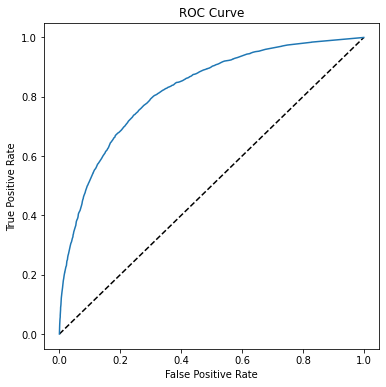

In [68]:
# Compute predicted probabilities
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [69]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8221


The final metrics for the tuned model are

1. Accuracy - 76.264
2. AUC - 0.8221

### Features of Importance

In [70]:
fi = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.294130
6,avg_rating_by_driver,0.145070
4,weekday_pct,0.116168
3,surge_pct,0.087598
1,avg_rating_of_driver,0.080608


The above information lets us see which of the features are most influential on the model. We can see that avg_dist has the most effect at 0.294, with avg_rating_by_driver and weekday_pct trailing behind with scores of 0.145 and 0.116 respectively

### Improvements

To improve rider retention, Ultimate should consider incentivizing trips in the first month with a type of promotion. Another consideration, is vetting drivers to ensure high quality service as rider experience is a crucial factor. Finally Ultimate may stand to incentivize weekday trips to better integrate Ultimate as a part of riders daily routine